In [3]:
from src.api import analysis as api

In [4]:
df_samples, df_counts, df_fpkm, df_fpkm_uq = api.get_data()
df_samples.shape

(1321, 17)

In [5]:
allowed_project_ids = list(df_samples['project id'].unique()[2:5])
df_samples, df_counts, df_fpkm, df_fpkm_uq = api.filter_data_by_column_value(df_samples, df_counts, df_fpkm, df_fpkm_uq, 'project id',      allowed_project_ids)

In [6]:
nstd_by_column = {
        'average base quality': 2, 
        'proportion_base_mismatch': 2,
        'proportion_reads_mapped': 2
}

df_samples, df_counts, df_fpkm, df_fpkm_uq = api.apply_cutoffs(df_samples, df_counts, df_fpkm, df_fpkm_uq, nstd_by_column)

In [7]:
df_samples.shape

(447, 17)

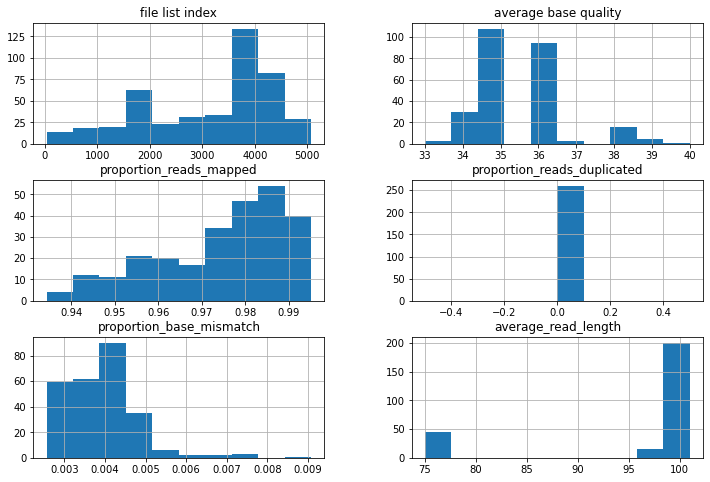

In [8]:
api.perform_eda(df_samples)

In [9]:
df_tpm = api.calculate_tpm(df_counts)

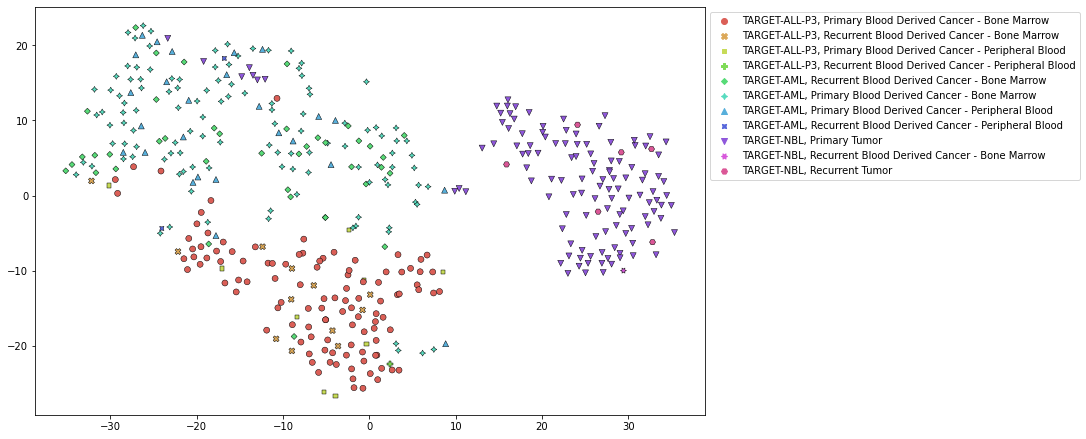

In [10]:
api.perform_tsne(df_tpm, df_samples)

In [ ]:
api.perform_pca(df_tpm, df_samples)

In [ ]:
df_samples['sample type'].unique()

In [ ]:
df_samples.shape, df_counts.shape, df_fpkm.shape, df_fpkm_uq.shape

In [ ]:
api.run_autoencoder(df_tpm, df_samples, dim_reduction_method='PCA', n_components=10)

In [ ]:
api.run_autoencoder(df_tpm, df_samples, dim_reduction_method='tSNE', n_components=2)

In [ ]:
from keras.models import load_model
encoder = load_model(api.AUTO_ENCODER_MODEL_PATH)

In [ ]:
encoded_out = encoder.predict(df_tpm)
encoded_out

In [ ]:
import pandas as pd
df = pd.DataFrame(encoded_out)

In [ ]:
api.perform_pca(df, df_samples[api.LABEL_COLUMN_NAME].sort_index(), n_components=10)